In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import pandas as pd
from sklearn.utils import shuffle


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import keras
from keras import models
from keras import layers

from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np

import numpy

import timeit
from keras.layers import Input, Flatten
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
data = pd.read_csv('songs.csv')
data = data.drop(['filename'],axis = 1)
data = shuffle(data)

In [0]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [0]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [0]:
X_train.shape

(800, 37)

In [0]:
Y_train.shape

(800,)

In [0]:



model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
#model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               9728      
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
__________

In [0]:
history = model.fit(X_train,
                    Y_train,
                    epochs=50,
                    batch_size=20,
                   validation_split=0.1)

Train on 720 samples, validate on 80 samples
Epoch 1/50
720/720 [==============================] - 0s 598us/step - loss: 2.4851 - acc: 0.1069 - val_loss: 2.2135 - val_acc: 0.3125
Epoch 2/50
720/720 [==============================] - 0s 123us/step - loss: 2.2888 - acc: 0.1431 - val_loss: 2.1064 - val_acc: 0.4250
Epoch 3/50
720/720 [==============================] - 0s 122us/step - loss: 2.1499 - acc: 0.2014 - val_loss: 1.9544 - val_acc: 0.3875
Epoch 4/50
720/720 [==============================] - 0s 117us/step - loss: 2.0880 - acc: 0.2347 - val_loss: 1.8265 - val_acc: 0.3625
Epoch 5/50
720/720 [==============================] - 0s 120us/step - loss: 1.9895 - acc: 0.2444 - val_loss: 1.7087 - val_acc: 0.3500
Epoch 6/50
720/720 [==============================] - 0s 116us/step - loss: 1.9128 - acc: 0.2972 - val_loss: 1.6316 - val_acc: 0.3750
Epoch 7/50
720/720 [==============================] - 0s 119us/step - loss: 1.8806 - acc: 0.3083 - val_loss: 1.5747 - val_acc: 0.4000
Epoch 8/50
720/72

In [0]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print('test_acc: ',test_acc)

200/200 [==============================] - 0s 81us/step
test_acc:  0.615


In [0]:
from matplotlib import pyplot

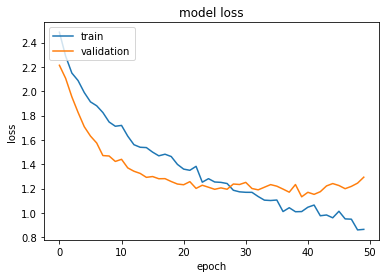

In [0]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

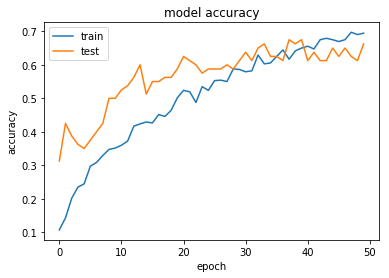

In [0]:
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()

In [0]:
import pickle

pickle.dump(model, open("model-keras2.pkl","wb"))
files.download('model-keras2.pkl')